In [1]:
%env OPEN3D_CPU_RENDERING true
import os
import pathlib
import trimesh
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import sys

import open3d as o3d
import torch
from tqdm.auto import tqdm

sys.path.append('/workspace/dev.sk_robot_rgbd_data/src')
from skrgbd.calibration.camera_models import load_colmap_camera
from skrgbd.data.processing.depth_utils.mesh_rendering_gl import MeshRenderer
from skrgbd.data.io.poses import Poses

sys.path.append('/workspace/dev.sk_robot_rgbd_data/misc/bits')
from check_projected_texture import get_pts_uv, occlude_pts
from pathlib import Path, PurePath

env: OPEN3D_CPU_RENDERING=true
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [6]:
base_dir = pathlib.Path("../../dataset/extracted/scene_04")
mesh_f = base_dir / "mesh.ply"
rgb_dir = base_dir / "rgb"
depth_dir = base_dir / "depth"
mat_dir = base_dir / "mat"

In [7]:
frame_idx = 21
rgb_f = rgb_dir / f"{frame_idx:05d}.png"
depth_f = depth_dir / f"{frame_idx:05d}.npz"
mat_f = mat_dir / f"{frame_idx:05d}.npz"

In [4]:
rgb = np.array(Image.open(rgb_f))
depth = np.load(depth_f)["depth"]
K = np.load(mat_f)["K"]
w2c = np.load(mat_f)["w2c"]

In [5]:
dict(np.load(mat_f)).keys()

dict_keys(['K', 'w2c'])

In [9]:
depth = np.load(depth_f)["depth"]

In [12]:
depth.shape

(256, 192)

In [6]:
K

array([[793.52119446,   0.        , 364.35685158],
       [  0.        , 793.52119446, 472.8208065 ],
       [  0.        ,   0.        ,   1.        ]])

In [7]:
w2c

array([[-0.61511976,  0.78359526,  0.08721343,  2.0448232 ],
       [-0.2149475 , -0.06024257, -0.9747659 , -1.9406817 ],
       [-0.7585679 , -0.61834407,  0.20548825,  2.7018735 ],
       [ 0.        ,  0.        ,  0.        ,  1.0000001 ]],
      dtype=float32)

In [8]:
str(mesh_f)

'../../dataset/extracted/scene_04/mesh.ply'

In [9]:
rec = o3d.io.read_triangle_mesh(str(mesh_f))

In [ ]:
intrinsics = self.get_intrinsics(cameras)

In [10]:
import open3d as o3d
import open3d.visualization.rendering as rendering

model = o3d.io.read_triangle_model(str(mesh_f))

render = rendering.OffscreenRenderer(720, 960)
# # render = o3d.visualization.Visualizer()
render.scene.add_model('model',model)
# render.scene.scene.set_sun_light([0.707, 0.0, -0.707], [1.0, 1.0, 1.0], 75000)
# render.scene.scene.enable_sun_light(True)
# # render.setup_camera(40.0, [0, 0.5 0], [1, 0.75, 1.75], [0, 1, 0])
render.setup_camera(K, w2c, 720, 960)
img = render.render_to_image()
# o3d.io.write_image("test.png", img, 9)

[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x7f50e554c010 (threading is enabled)
EGL(1.5)
OpenGL(4.5)


In [17]:
render.scene.add_model('model',model)

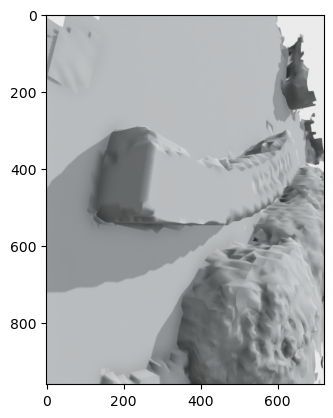

In [11]:
plt.imshow(img)

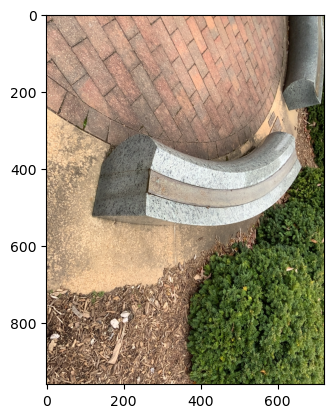

In [12]:
plt.imshow(np.array(Image.open(rgb_f)))

In [1]:
%env OPEN3D_CPU_RENDERING true
import pathlib
import trimesh
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

env: OPEN3D_CPU_RENDERING=true


In [3]:
# extrinsic = np.array([[ 0.2530666 ,  0.157411  ,  0.95455698,  0.00298524],
#        [-0.96727976,  0.02272211,  0.25269261,  0.01620861],
#        [ 0.01808705, -0.98727176,  0.15801071, -1.24145633],
#        [ 0.        ,  0.        ,  0.        ,  1.        ]])
extrinsic = np.array([[ 0.99715909,  0.02574675,  0.07078743, -0.13201629],
       [-0.07400251,  0.15957711,  0.98440784, -2.20198559],
       [ 0.01404924, -0.98684965,  0.16102907, -0.68816352],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

# extrinsic = np.array([[-0.6584123 ,  0.33903083, -0.67197568,  0.32852667],
#        [ 0.70491929, -0.0351335 , -0.70841683, -0.04654946],
#        [-0.26378403, -0.94011902, -0.21585707, -0.96735004],
#        [ 0.        ,  0.        ,  0.        ,  1.        ]])


intrinsic = np.array([[4.75527192e+03, 0.00000000e+00, 3.53950000e+03],
       [0.00000000e+00, 4.75527192e+03, 2.34200000e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [4]:
import open3d as o3d
import open3d.visualization.rendering as rendering

model = o3d.io.read_triangle_model('/workspace/advtex_init_align/dataset/extracted/east_underchearch/mesh.ply')

render = rendering.OffscreenRenderer(7079,4684)
# # render = o3d.visualization.Visualizer()
render.scene.add_model('model',model)
# render.scene.scene.set_sun_light([0.707, 0.0, -0.707], [1.0, 1.0, 1.0], 75000)
# render.scene.scene.enable_sun_light(True)
# # render.setup_camera(40.0, [0, 0.5 0], [1, 0.75, 1.75], [0, 1, 0])
render.setup_camera(intrinsic, np.linalg.inv(extrinsic), 7079,4684)
img = render.render_to_image()
# o3d.io.write_image("test.png", img, 9)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x46048b0 (threading is enabled)
EGL(1.5)
OpenGL(4.5)


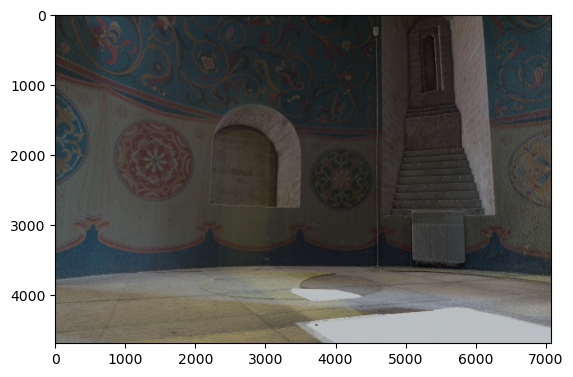

In [5]:
plt.imshow(img)

In [5]:
K.shape, w2c.shape

((3, 3), (4, 4))

In [6]:
mesh = trimesh.load(mesh_f, process=False)
verts = np.array(mesh.vertices)
n_verts = verts.shape[0]

In [7]:
homo_coords = np.concatenate((verts, np.ones((n_verts, 1))), axis=1)  # [N, 4]
cam_coords = np.matmul(w2c, homo_coords.T).T
cam_coords = cam_coords[:, :3] / cam_coords[:, 3:]

In [8]:
pix_coords = np.matmul(K, cam_coords.T).T
pix_coords = pix_coords[:, :2] / pix_coords[:, 2:]

# filter points that are out of view
h, w, _ = rgb.shape
flag = (
    (pix_coords[:, 0] >= 0) &
    (pix_coords[:, 0] < w) &
    (pix_coords[:, 1] >= 0) &
    (pix_coords[:, 1] < h)
)
filtered_pix_coords = pix_coords[flag, :]

/tmp/ipykernel_4838/1051644782.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(grid[0, 0]).imshow(rgb)


(0.0, 960.0)

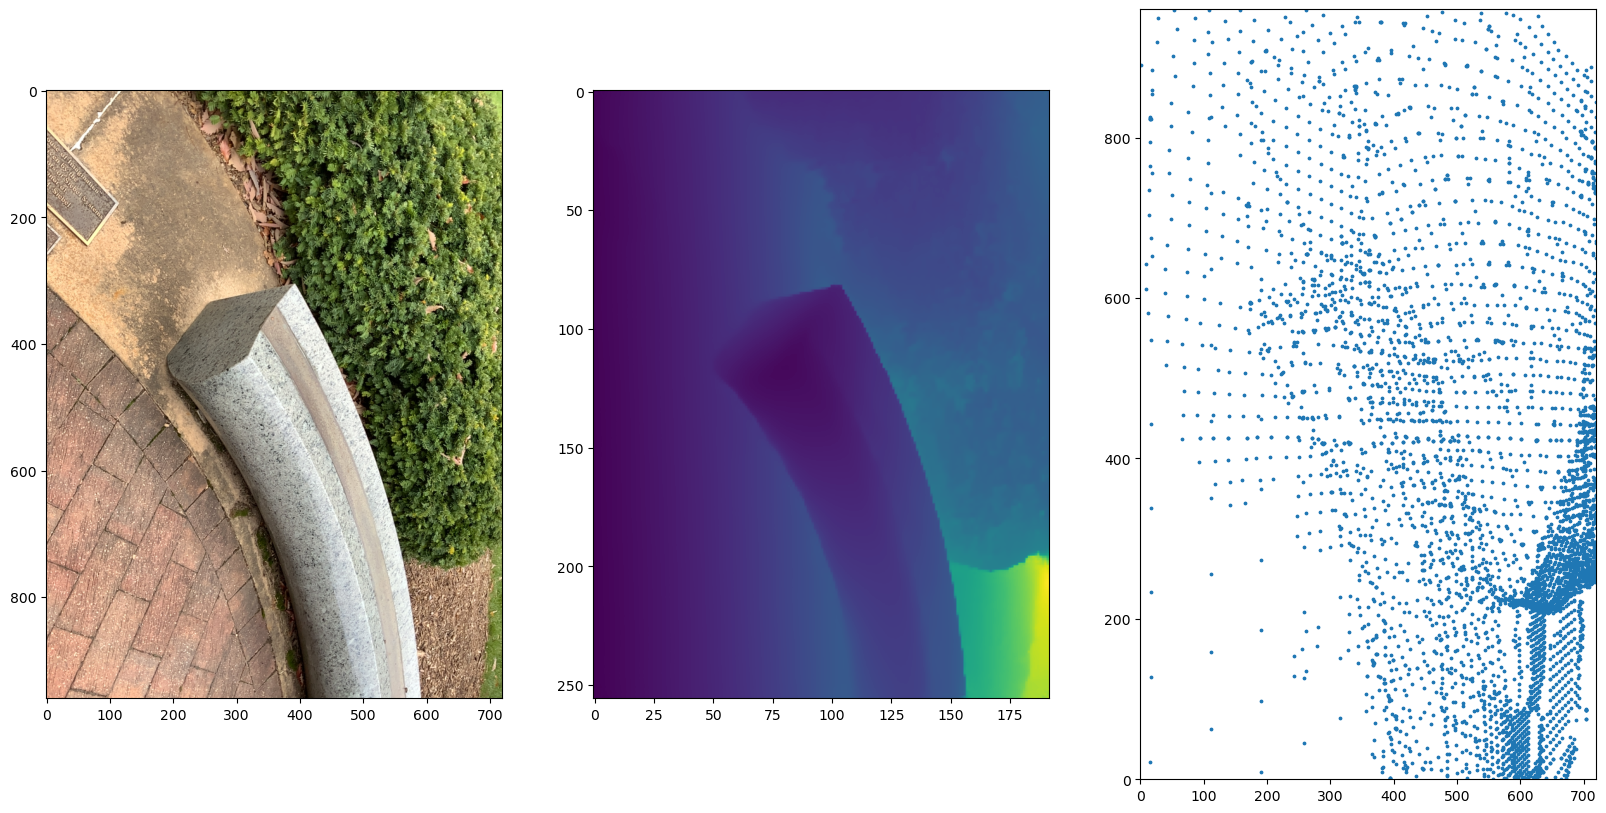

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
grid = plt.GridSpec(1, 3, figure=fig)

plt.subplot(grid[0, 0]).imshow(rgb)

plt.subplot(grid[0, 1]).imshow(depth)

ax = plt.subplot(grid[0, 2])
ax.scatter(filtered_pix_coords[:, 0], h - filtered_pix_coords[:, 1], s=3)
ax.set_xlim([0, w])
ax.set_ylim([0, h])